In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

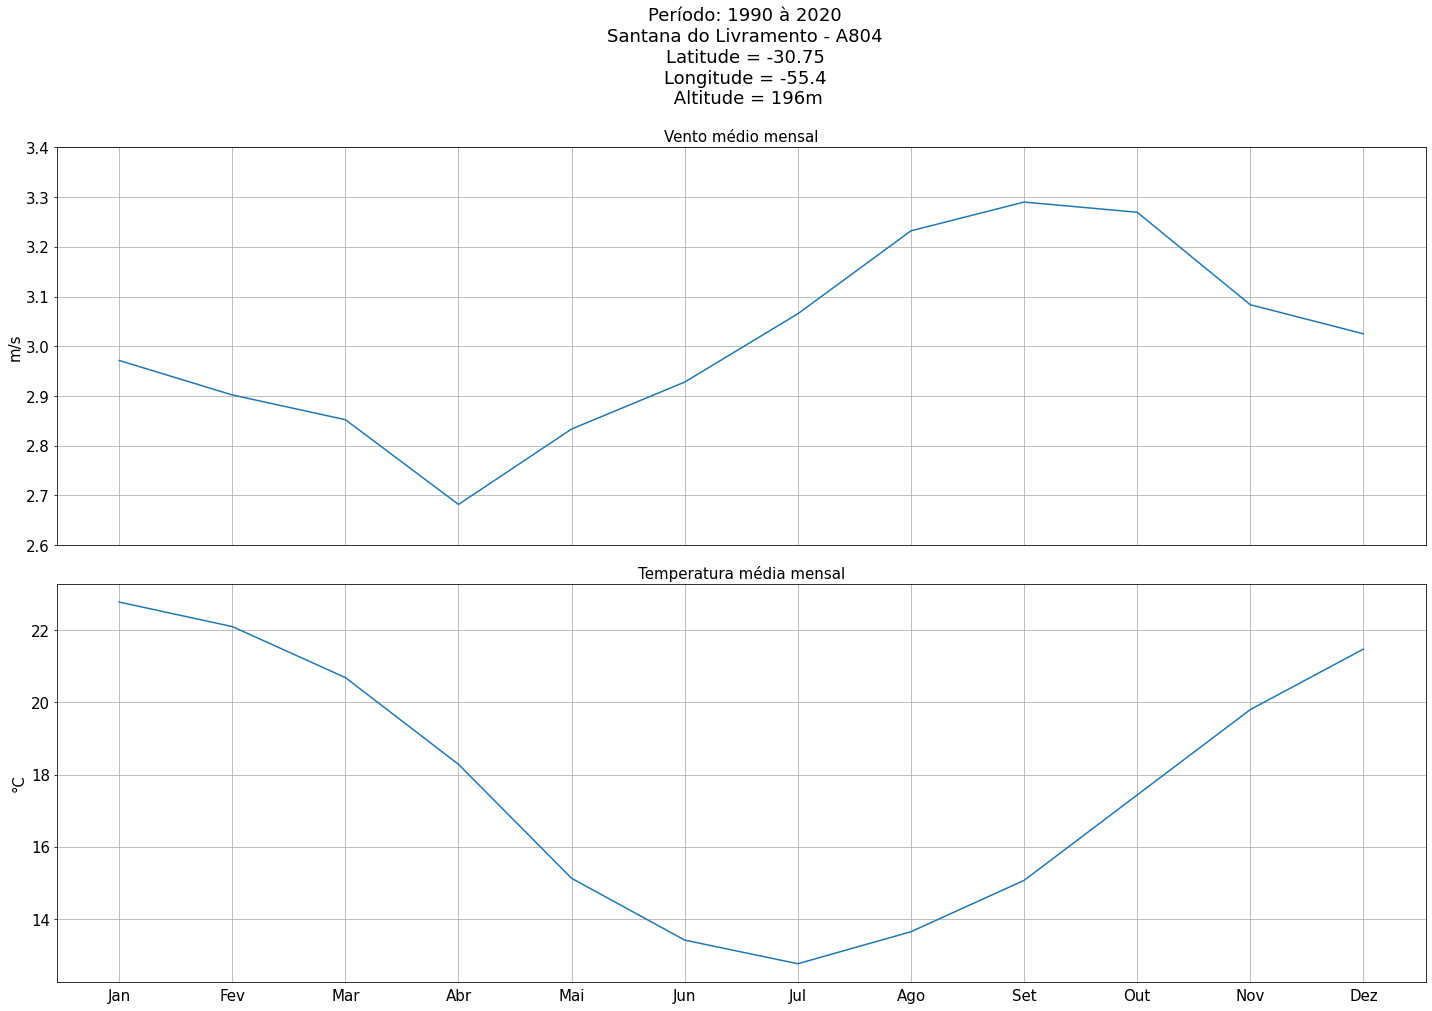

In [82]:
path = "/media/lucasdmarten/HD/DADOS_TCC/dados_estacao/historicos/dados_A804_M_2001-11-21_2020-01-01.csv"
d = pd.read_csv(path,skiprows=9,delimiter=';').interpolate()
d.index = pd.to_datetime(d["Data Medicao"])
df = d.groupby(d.index.month).mean()
df.index = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
ndays_precip=df["NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)"].tolist()
mean_pressure_month=df["PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)"].tolist()
mean_wind_month=df["VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)"].tolist()
mean_temperature_month=df["TEMPERATURA MEDIA, MENSAL (AUT)(°C)"].tolist()
fig, axs = plt.subplots(2,figsize =(20, 14))

plt.suptitle("Período: 1990 à 2020\nSantana do Livramento - A804\nLatitude = -30.75\nLongitude = -55.4\n Altitude = 196m",
             fontsize=18, y=1,x=0.52)

# Creating plot
axs[0].plot(df.index,mean_wind_month)
axs[0].set_title("Vento médio mensal",fontsize=15)
axs[0].set_ylim(2.6,3.4)
axs[0].set_ylabel('m/s',fontsize=15)
axs[0].grid(True)
axs[0].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelsize=15)

axs[1].plot(df.index,mean_temperature_month)
axs[1].set_title("Temperatura média mensal",fontsize=15)
axs[1].set_ylim(np.min(mean_temperature_month)-0.5,np.max(mean_temperature_month)+0.5)
axs[1].set_ylabel('°C',fontsize=15)
axs[1].grid(True)
axs[1].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize=15)

# axs[2].plot(df.index,mean_temperature_month)
# axs[2].set_title("Temperatura média mensal",fontsize=15)
# axs[2].set_ylim(np.min(mean_temperature_month)-0.5,np.max(mean_temperature_month)+0.5)
# axs[2].set_ylabel('°C',fontsize=15)
# axs[2].grid(True)
# axs[2].tick_params(
#     axis='both',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=True,
#     labelsize=15)

# axs[3].bar(height=ndays_precip,x=df.index)
# axs[3].set_title("N° de dias com chuva, média mensal",fontsize=15)
# axs[3].set_ylim(0,np.max(ndays_precip)+0.5)
# axs[3].grid(True)
# axs[3].tick_params(
#     axis='both',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=True,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=True,
#     labelsize=15)

plt.savefig('month_mean_A804.png', dpi=300, edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.tight_layout()
plt.show()

Fonte: Banco de Dados Meteorológicos do INMET (BDMEP)